# Monthly Sales Data of Ice Cream from 2016 to 2020

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.gofplots import qqplot
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

This project aims to analyze the amount of units sold monthly of an ice cream company using time series forecasting techniques. By applying models such as ARIMA, we seek to identify patterns, assess stationarity, and generate future price predictions based on historical data.


In [ ]:
df = pd.read_csv('ice_cream.csv')
df.head()

,Date,Monthly Units Sold,Unnamed: 2,Unnamed: 3
0,01/12/2019,75.7094,1,1
1,01/11/2019,79.7223,2,1
2,01/10/2019,90.1684,3,1
3,01/09/2019,100.1741,4,2
4,01/08/2019,102.6085,5,2


The seasonal dataset was obtained from KAGGLE, a leading stock exchange, and contains monthly ice cream sales data. The original dataset included a larger range of observations, but for the purpose of this study, it was narrowed down to the most recent 51 observations from 2016 to 2020 to focus on seasonal fluctuations.

## Time Series Visualization

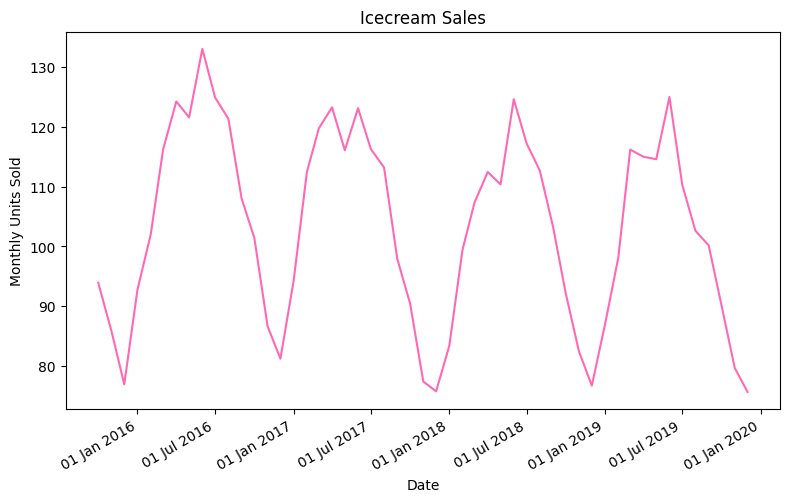

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

fig, ax = plt.subplots(figsize=(8, 5))

# Plotting the time series
fig.autofmt_xdate()
plt.plot(df['Date'], df['Monthly Units Sold'], color='hotpink')
plt.xlabel('Date')
plt.ylabel('Monthly Units Sold')
plt.title('Icecream Sales')
plt.tight_layout()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'))


plt.savefig('figures.png', dpi=300)
plt.show()

We used Time Series Decomposition to separate the time series into four components: an observed component, a trend component, a seasonal component, and the residuals. The trend shows the overall direction of the time series, whether it’s increasing or decreasing over time. In this graph, we can see that there is a clear upwards trend in the last 5 years for ice cream sales, with it peaking in the summer of 2019. While it is leading slightly downwards in recent years, it is still significantly higher than before the year of 2018.


The seasonal component shows the repeating patterns that occur at regular intervals. In this graph, they cycle every year with the lowest sales at the start of the year in January and the highest sales in the middle of the year in summer.


The residuals represent random fluctuations that aren’t or can’t be explained by trend or seasonality.


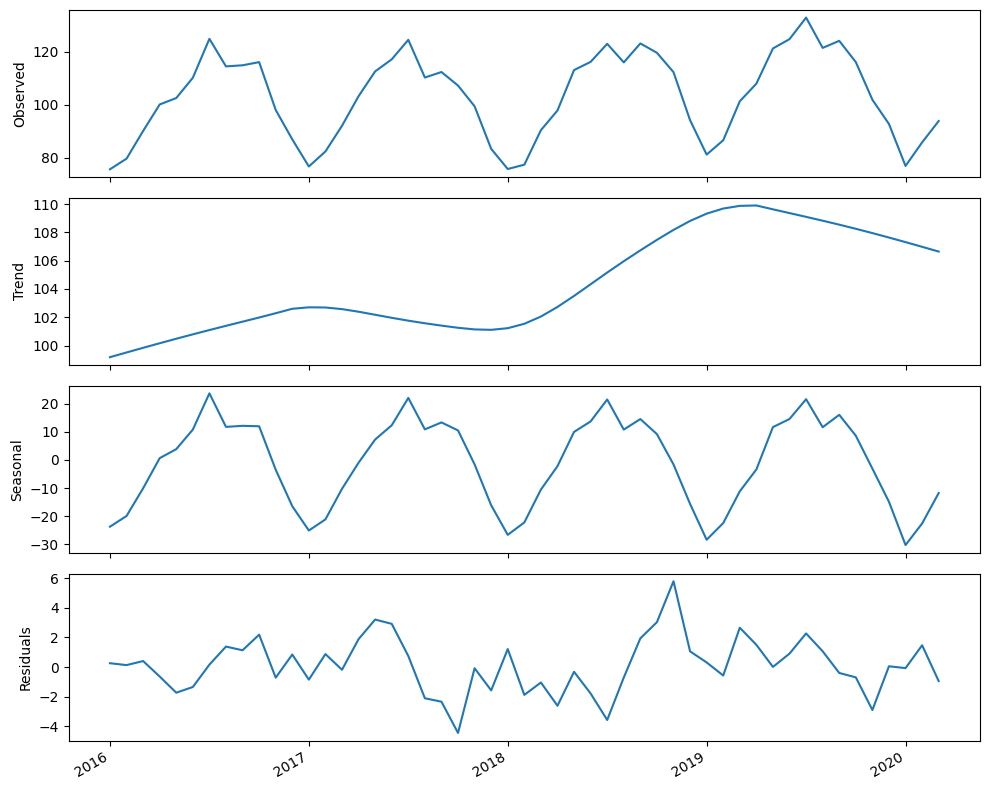

In [ ]:

decomposition = STL(df['Monthly Units Sold'], period=12).fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10,8))

ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(decomposition.resid)
ax4.set_ylabel('Residuals')

num_ticks = len(np.arange(0, 51, 12))
years = np.arange(2016, 2016 + num_ticks, 1)
plt.xticks(np.arange(0, 51, 12), years)


fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures.png', dpi=300)

##Tentative Model Identification

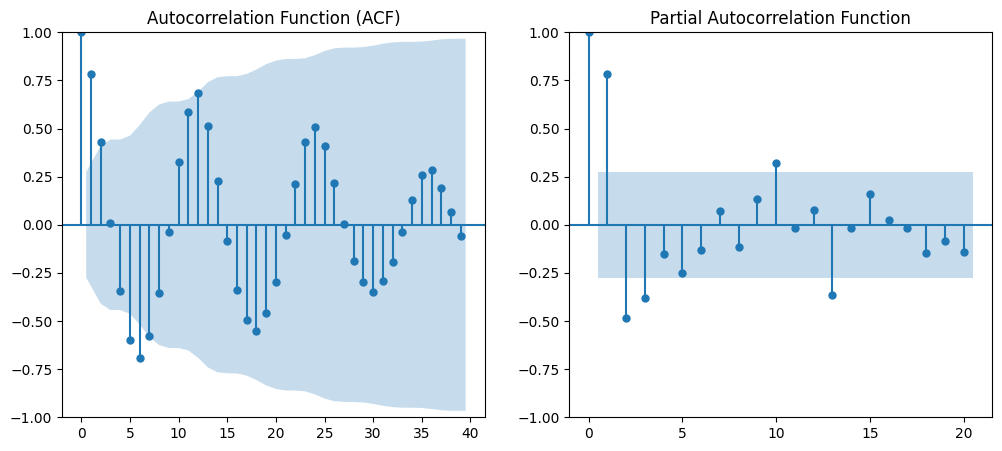

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(df['Monthly Units Sold'], lags=39, ax=axes[0])
plot_pacf(df['Monthly Units Sold'], lags=20, ax=axes[1])
axes[0].set_title('Autocorrelation Function (ACF)')
axes[1].set_title('Partial Autocorrelation Function')

plt.savefig('figures.png', dpi=300)
plt.show()

The ACF plot shows a strong autocorrelation at lag 1, which gradually decreases but exhibits periodic peaks.
The shaded blue area represents the confidence interval, and values outside this range are statistically significant.
The slow decay pattern indicates a non-stationary series, meaning differencing might be required before applying time series models.

The PACF plot shows a significant spike at lag 1 and some other lags within the confidence interval, suggesting that a low-order autoregressive (AR) model might be suitable.
The cut-off after a few lags suggests that an AR model with a low lag order (e.g., AR(1) or AR(2)) could explain the data well.


The presence of periodic peaks in the ACF suggests a seasonal ARIMA (SARIMA) model might be appropriate.
Differencing the data may be needed to remove trend effects.


## Next Steps

For the next steps we will need be differencing the data to make it be stationary. Afterwards we will try fit it into the ARIMA model which it what we except will be the model that fits that most.